In [1]:
import numpy as np
import seaborn as sns
import pickle
from py_classes.movements import Movements
import py_classes.preprocess as prep

# 1. Preparations

First of all we need to load the train and validation data and, of course, the trained model:

In [2]:
x_train, y_train, x_validation, y_validation = prep.loadXY_validation()

with open('./data/model/NN.pkl', 'rb') as f:
    NN = pickle.load(f)

# 2. Validation

First we will check the accuracy during training:

Accuracy: 94.57303937296604 %
Number of samples:  65451
[34349.  4276.  6216.  4887.  4723.  3046.  3679.  4275.]


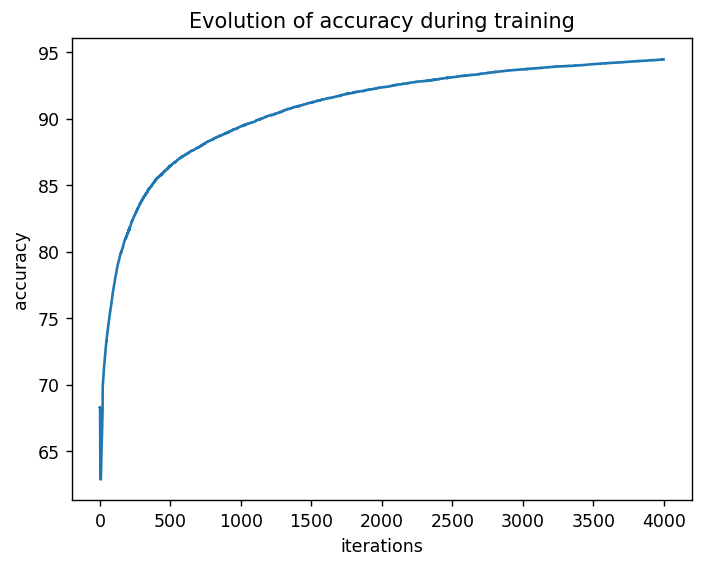

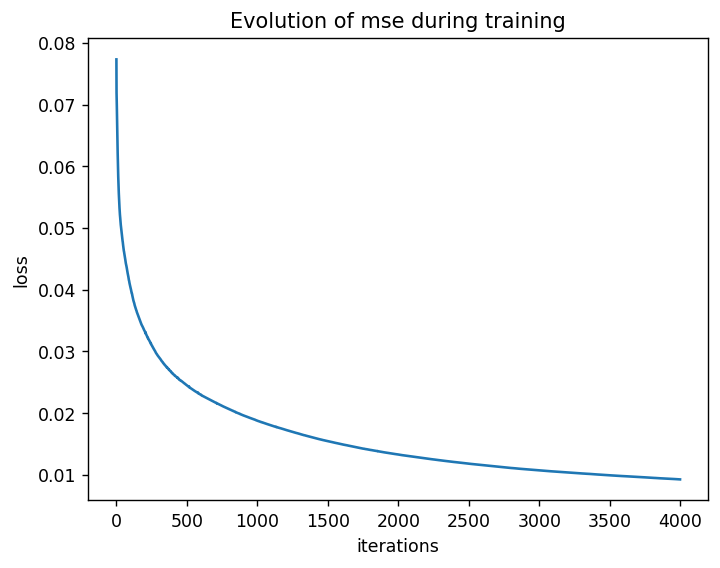

In [3]:
NN.validation(x_train,y_train)
print("Number of samples: ", x_train.shape[0])
print(np.sum(y_train, axis=0))
NN.plot_accuracy()
NN.plot_learning()

Let's check what are the missclassificated samples:

In [4]:
idx = 0
fails = 0
list_booleans = []
predictions_train = []
for idx in range(len(x_train)):
    x = x_train[idx].reshape(1, -1)
    prediction = NN.predict(x)
    predictions_train.append(prediction)
    if(prediction != np.argmax(y_train[idx])):
        print(str("%3s" % idx) + ")", "Prediction: ", prediction, "    |    Real: ", np.argmax(y_train[idx]))
        fails += 1
    list_booleans.append(prediction == np.argmax(y_train[idx]))
print("\nNumber of fails:", str(fails) + "/" + str(len(x_train)), ":", fails/len(x_train) * 100,"%")

  3) Prediction:  0     |    Real:  5
 24) Prediction:  0     |    Real:  6
102) Prediction:  3     |    Real:  1
119) Prediction:  4     |    Real:  0
157) Prediction:  0     |    Real:  3
171) Prediction:  0     |    Real:  1
181) Prediction:  0     |    Real:  4
186) Prediction:  6     |    Real:  1
212) Prediction:  1     |    Real:  0
224) Prediction:  0     |    Real:  5
234) Prediction:  0     |    Real:  7
238) Prediction:  2     |    Real:  0
279) Prediction:  0     |    Real:  3
282) Prediction:  0     |    Real:  5
291) Prediction:  2     |    Real:  4
295) Prediction:  0     |    Real:  6
351) Prediction:  0     |    Real:  7
369) Prediction:  0     |    Real:  2
390) Prediction:  0     |    Real:  5
395) Prediction:  0     |    Real:  5
402) Prediction:  0     |    Real:  4
404) Prediction:  0     |    Real:  7
426) Prediction:  0     |    Real:  2
439) Prediction:  0     |    Real:  6
516) Prediction:  2     |    Real:  7
537) Prediction:  0     |    Real:  3
540) Predict

Now we can validate our model by checking the accuracy of data never seen before:

In [5]:
NN.validation(x_validation,y_validation)
print("Number of samples: ", x_validation.shape[0])
print(np.sum(y_validation, axis=0))

Accuracy: 85.26055272927266 %
Number of samples:  7273
[3851.  475.  679.  545.  490.  358.  373.  502.]


Again we can check what are the missclassificated samples:

In [6]:
idx = 0
fails = 0
list_predictions = []
predictions_validation = []
for idx in range(len(x_validation)):
    prediction = NN.predict(x_validation[idx])
    predictions_validation.append(prediction)
    if(prediction != np.argmax(y_validation[idx])):
        print(str("%3s" % idx) + ")", "Prediction: ", prediction, "    |    Real: ", np.argmax(y_validation[idx]))
        fails += 1
    list_predictions.append(prediction.astype(int))
print("\nNumber of fails:", str(fails) + "/" + str(len(x_validation)), ":", fails/len(x_validation) * 100,"%")

  4) Prediction:  2     |    Real:  7
 14) Prediction:  0     |    Real:  3
 30) Prediction:  0     |    Real:  5
 39) Prediction:  3     |    Real:  0
 43) Prediction:  3     |    Real:  0
 44) Prediction:  0     |    Real:  3
 51) Prediction:  3     |    Real:  0
 53) Prediction:  0     |    Real:  2
 55) Prediction:  1     |    Real:  0
 58) Prediction:  0     |    Real:  5
 70) Prediction:  0     |    Real:  2
 73) Prediction:  0     |    Real:  4
 77) Prediction:  0     |    Real:  5
 83) Prediction:  0     |    Real:  5
 98) Prediction:  4     |    Real:  0
105) Prediction:  2     |    Real:  0
106) Prediction:  0     |    Real:  2
111) Prediction:  1     |    Real:  0
117) Prediction:  6     |    Real:  5
127) Prediction:  0     |    Real:  6
150) Prediction:  0     |    Real:  7
170) Prediction:  0     |    Real:  3
183) Prediction:  1     |    Real:  3
194) Prediction:  7     |    Real:  0
195) Prediction:  3     |    Real:  6
200) Prediction:  0     |    Real:  1
211) Predict

## 2.1. F1 Score

A better way of checking if our model works accurately is by using F1 score. F1 score combines precision and recall

First of all we have to define the function:

In [11]:
def f1_score(h, y):
    h = np.round(h)

    true_positives = (h == 1) & (y == 1)
    false_positives = (h == 1) & (y == 0)
    false_negatives = (h == 0) & (y == 1)

    precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))
    recall = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_negatives))

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

Let's adjust our data to fit as its input:

In [8]:
y_train_no_hot = np.argmax(y_train, axis=1)
y_validation_no_hot = np.argmax(y_validation, axis=1)

In [9]:
f1_train = f1_score(predictions_train, y_train_no_hot)
f1_validation = f1_score(predictions_validation, y_validation_no_hot)

And finally, we can check if our model is valid:

In [10]:
print("F1 score on train set: ", f1_train * 100, "%")
print("F1 score on validation set: ", f1_validation * 100, "%")

F1 score on train set:  94.40841796158081 %
F1 score on validation set:  80.04587155963301 %


# 3. Confusion matrix

A good way to visually understand how did well did the model performed on the validation data is by creating a confusion matrix.

This matrix represents the way samples have been clasified. If the main diagonal is shown then the model acts as expected:

Move type idle:

	· 3484 idle movements have been classified as idle.

	· 104 idle movements have been classified as rotate.

	· 96 idle movements have been classified as swipe_left.

	· 88 idle movements have been classified as swipe_right.

	· 54 idle movements have been classified as rotate_left.

	· 120 idle movements have been classified as table_flip.

	· 46 idle movements have been classified as zoom_in.

	· 70 idle movements have been classified as zoom_out.

Move type rotate:

	· 70 rotate movements have been classified as idle.

	· 349 rotate movements have been classified as rotate.

	· 0 rotate movements have been classified as swipe_left.

	· 11 rotate movements have been classified as swipe_right.

	· 0 rotate movements have been classified as rotate_left.

	· 6 rotate movements have been classified as table_flip.

	· 4 rotate movements have been classified as zoom_in.

	· 3 rotate movements have been classified as zoom_out.

Move type swipe_left:

	· 73 swipe_left moveme

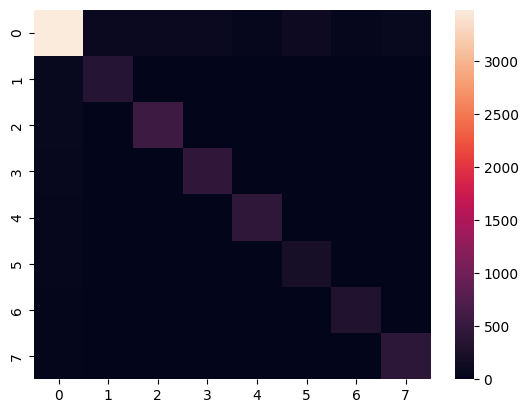

In [12]:
confusion_m = NN.getConfusionMatrix(list_predictions, y_validation)

sns.heatmap(confusion_m)

for i in range(len(confusion_m)):
    print("Move type " + Movements(i).name + ":\n")
    for j in range(len(Movements)):
        print("\t· " + str((confusion_m[i,j]).astype(int)) +  " " + Movements(i).name + " movements have been classified as " + Movements(j).name +".\n")